In [1]:
from keras.datasets import imdb
(x_train, y_train), (x_test, y_test) = imdb.load_data()
cutoff = 500

Using TensorFlow backend.
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [2]:
from keras.preprocessing import sequence
x_train_padded = sequence.pad_sequences(x_train, maxlen=cutoff)
x_test_padded = sequence.pad_sequences(x_test, maxlen=cutoff)

In [3]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense

# Exercise 1

In [4]:
lstm_model = Sequential()
lstm_model.add(Embedding(input_dim=len(imdb.get_word_index())+3, output_dim=100, input_length=cutoff))
# return_sequences tells the LSTM to output the full sequence, for use by the next LSTM layer. The final
# LSTM layer should return only the output sequence, for use in the Dense output layer
lstm_model.add(LSTM(units=32, return_sequences=True))
lstm_model.add(LSTM(units=32))
lstm_model.add(Dense(units=1, activation='sigmoid')) # because at the end, we want one yes/no answer
lstm_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['binary_accuracy'])

In [5]:
lstm_model.fit(x_train_padded, y_train, epochs=1, batch_size=64)

Epoch 1/1
25000/25000 [==============================] - 328s 13ms/step - loss: 0.3949 - binary_accuracy: 0.8196


In [6]:
lstm_scores = lstm_model.evaluate(x_test_padded, y_test)
print('loss: {} accuracy: {}'.format(*lstm_scores))

25000/25000 [==============================] - 3291s 132ms/step
loss: 0.30495674679756163 accuracy: 0.87688


In [7]:
from keras.layers import GRU, SimpleRNN
new_model = Sequential()
new_model.add(Embedding(input_dim=len(imdb.get_word_index())+3, output_dim=100, input_length=cutoff))
new_model.add(LSTM(units=32, return_sequences=True))
new_model.add(GRU(units=32, return_sequences=True))
new_model.add(SimpleRNN(units=32, return_sequences=True))
new_model.add(LSTM(units=32))
new_model.add(Dense(units=1, activation='sigmoid'))
new_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['binary_accuracy'])

In [8]:
new_model.fit(x_train_padded, y_train, epochs=1, batch_size=64)

Epoch 1/1
25000/25000 [==============================] - 462s 18ms/step - loss: 0.4287 - binary_accuracy: 0.7849


In [9]:
new_scores = new_model.evaluate(x_test_padded, y_test)
print('loss: {} accuracy: {}'.format(*new_scores))

25000/25000 [==============================] - 130s 5ms/step
loss: 0.3242102332210541 accuracy: 0.86644


In [10]:
import numpy

# Exercise 2a

In [11]:
one_unit_SRNN = Sequential()
one_unit_SRNN.add(SimpleRNN(units=1, input_shape=(None, 1), activation='linear', use_bias=False))

In [12]:
one_unit_SRNN_weights = one_unit_SRNN.get_weights()
one_unit_SRNN_weights

[array([[0.05797446]], dtype=float32), array([[1.]], dtype=float32)]

In [13]:
one_unit_SRNN_weights[0][0][0] = 1
one_unit_SRNN_weights[1][0][0] = 1
one_unit_SRNN.set_weights(one_unit_SRNN_weights)
one_unit_SRNN.get_weights()

[array([[1.]], dtype=float32), array([[1.]], dtype=float32)]

In [14]:
one_unit_SRNN.predict(numpy.array([ [[3], [3], [7]] ]))

array([[13.]], dtype=float32)

In [15]:
one_unit_SRNN.predict(numpy.array([ [[4], [4], [8]] ]))

array([[16.]], dtype=float32)

In [16]:
one_unit_SRNN_weights[0][0][0] = 2
one_unit_SRNN_weights[1][0][0] = 1
one_unit_SRNN.set_weights(one_unit_SRNN_weights)
one_unit_SRNN.get_weights()
one_unit_SRNN.predict(numpy.array([ [[4], [4], [8]] ])) #all by 2

array([[32.]], dtype=float32)

In [17]:
one_unit_SRNN_weights[0][0][0] = 1
one_unit_SRNN_weights[1][0][0] = 2
one_unit_SRNN.set_weights(one_unit_SRNN_weights)
one_unit_SRNN.get_weights()
one_unit_SRNN.predict(numpy.array([ [[4], [4], [8]] ])) #by 4, 2, 1

array([[32.]], dtype=float32)

In [18]:
one_unit_SRNN_weights[0][0][0] = 2
one_unit_SRNN_weights[1][0][0] = 2
one_unit_SRNN.set_weights(one_unit_SRNN_weights)
one_unit_SRNN.get_weights()
one_unit_SRNN.predict(numpy.array([ [[4], [4], [8]] ])) #by 8, 4, 2

array([[64.]], dtype=float32)

In [19]:
one_unit_SRNN_weights[0][0][0] = 1
one_unit_SRNN_weights[1][0][0] = 3
one_unit_SRNN.set_weights(one_unit_SRNN_weights)
one_unit_SRNN.get_weights()
one_unit_SRNN.predict(numpy.array([ [[4], [4], [8]] ])) #by 9, 3, 1

array([[56.]], dtype=float32)

In [20]:
one_unit_SRNN_weights[0][0][0] = 1
one_unit_SRNN_weights[1][0][0] = -1
one_unit_SRNN.set_weights(one_unit_SRNN_weights)
one_unit_SRNN.get_weights()
one_unit_SRNN.predict(numpy.array([ [[4], [4], [8]] ])) #by 1, -1, 1

array([[8.]], dtype=float32)

In [21]:
one_unit_SRNN_weights[0][0][0] = 1
one_unit_SRNN_weights[1][0][0] = 0
one_unit_SRNN.set_weights(one_unit_SRNN_weights)
one_unit_SRNN.get_weights()
one_unit_SRNN.predict(numpy.array([ [[31546], [1243], [8]] ])) #by 0, 0, 1

array([[8.]], dtype=float32)

The values (a, b, and c) and weights (w1 and w2) seem to act in the relationship w1(a(w2^2)+b(w2)+c)

## Exercise 2b

In [22]:
two_unit_SRNN = Sequential()
two_unit_SRNN.add(SimpleRNN(units=2, input_shape=(None, 1), activation='linear', use_bias=False))

In [23]:
two_unit_SRNN_weights = two_unit_SRNN.get_weights()
two_unit_SRNN_weights

[array([[0.79140246, 0.7564894 ]], dtype=float32),
 array([[-0.66223496, -0.74929625],
        [-0.74929625,  0.66223496]], dtype=float32)]

In [24]:
two_unit_SRNN_weights[0][0][0] = 1
two_unit_SRNN_weights[0][0][1] = 1
two_unit_SRNN_weights[1][0][0] = 1
two_unit_SRNN_weights[1][0][1] = 0
two_unit_SRNN_weights[1][1][0] = 0
two_unit_SRNN_weights[1][1][1] = 0
two_unit_SRNN.set_weights(two_unit_SRNN_weights)
two_unit_SRNN.get_weights()

[array([[1., 1.]], dtype=float32), array([[1., 0.],
        [0., 0.]], dtype=float32)]

In [25]:
two_unit_SRNN.predict(numpy.array([ [[3], [3], [7], [5]] ]))

array([[18.,  5.]], dtype=float32)

In [82]:
two_unit_SRNN_weights[0][0][0] = 945 #w1
w1 = two_unit_SRNN_weights[0][0][0]
two_unit_SRNN_weights[0][0][1] = 71324 #w4
w4 = two_unit_SRNN_weights[0][0][1]
two_unit_SRNN_weights[1][0][0] = 4456 #w2
w2 = two_unit_SRNN_weights[1][0][0]
two_unit_SRNN_weights[1][0][1] = 834 #w6
w6 = two_unit_SRNN_weights[1][0][1]
two_unit_SRNN_weights[1][1][0] = 4246 #w3
w3 = two_unit_SRNN_weights[1][1][0]
two_unit_SRNN_weights[1][1][1] = 964 #w5
w5 = two_unit_SRNN_weights[1][1][1]
two_unit_SRNN.set_weights(two_unit_SRNN_weights)
a=543
b=232
c=45
d=7433
print(w2*(w2*(a*w1*w2+a*w3*w4+b*w1)+w3*(a*w4*w5+a*w1*w6+b*w4)+c*w1)+w3*(w5*(a*w4*w5+a*w1*w6+b*w4)+w6*(a*w1*w2+a*w3*w4+b*w1)+c*w4)+d*w1, w5*(w5*(a*w4*w5+a*w1*w6+b*w4)+w6*(a*w1*w2+a*w3*w4+b*w1)+c*w4)+w6*(w2*(a*w1*w2+a*w3*w4+b*w1)+w3*(a*w4*w5+a*w1*w6+b*w4)+c*w1)+d*w4)
two_unit_SRNN.predict(numpy.array([ [[a], [b], [c], [d]] ])) #a,b,c,d

4.770418318284568e+18 9.225557247966673e+17


array([[4.770418e+18, 9.225557e+17]], dtype=float32)

w2*(w2*(a*w1*w2+a*w3*w4+b*w1)+w3*(a*w4*w5+a*w1*w6+b*w4)+c*w1)+w3*(w5*(a*w4*w5+a*w1*w6+b*w4)+w6*(a*w1*w2+a*w3*w4+b*w1)+c*w4)+d*w1, w5*(w5*(a*w4*w5+a*w1*w6+b*w4)+w6*(a*w1*w2+a*w3*w4+b*w1)+c*w4)+w6*(w2*(a*w1*w2+a*w3*w4+b*w1)+w3*(a*w4*w5+a*w1*w6+b*w4)+c*w1)+d*w4

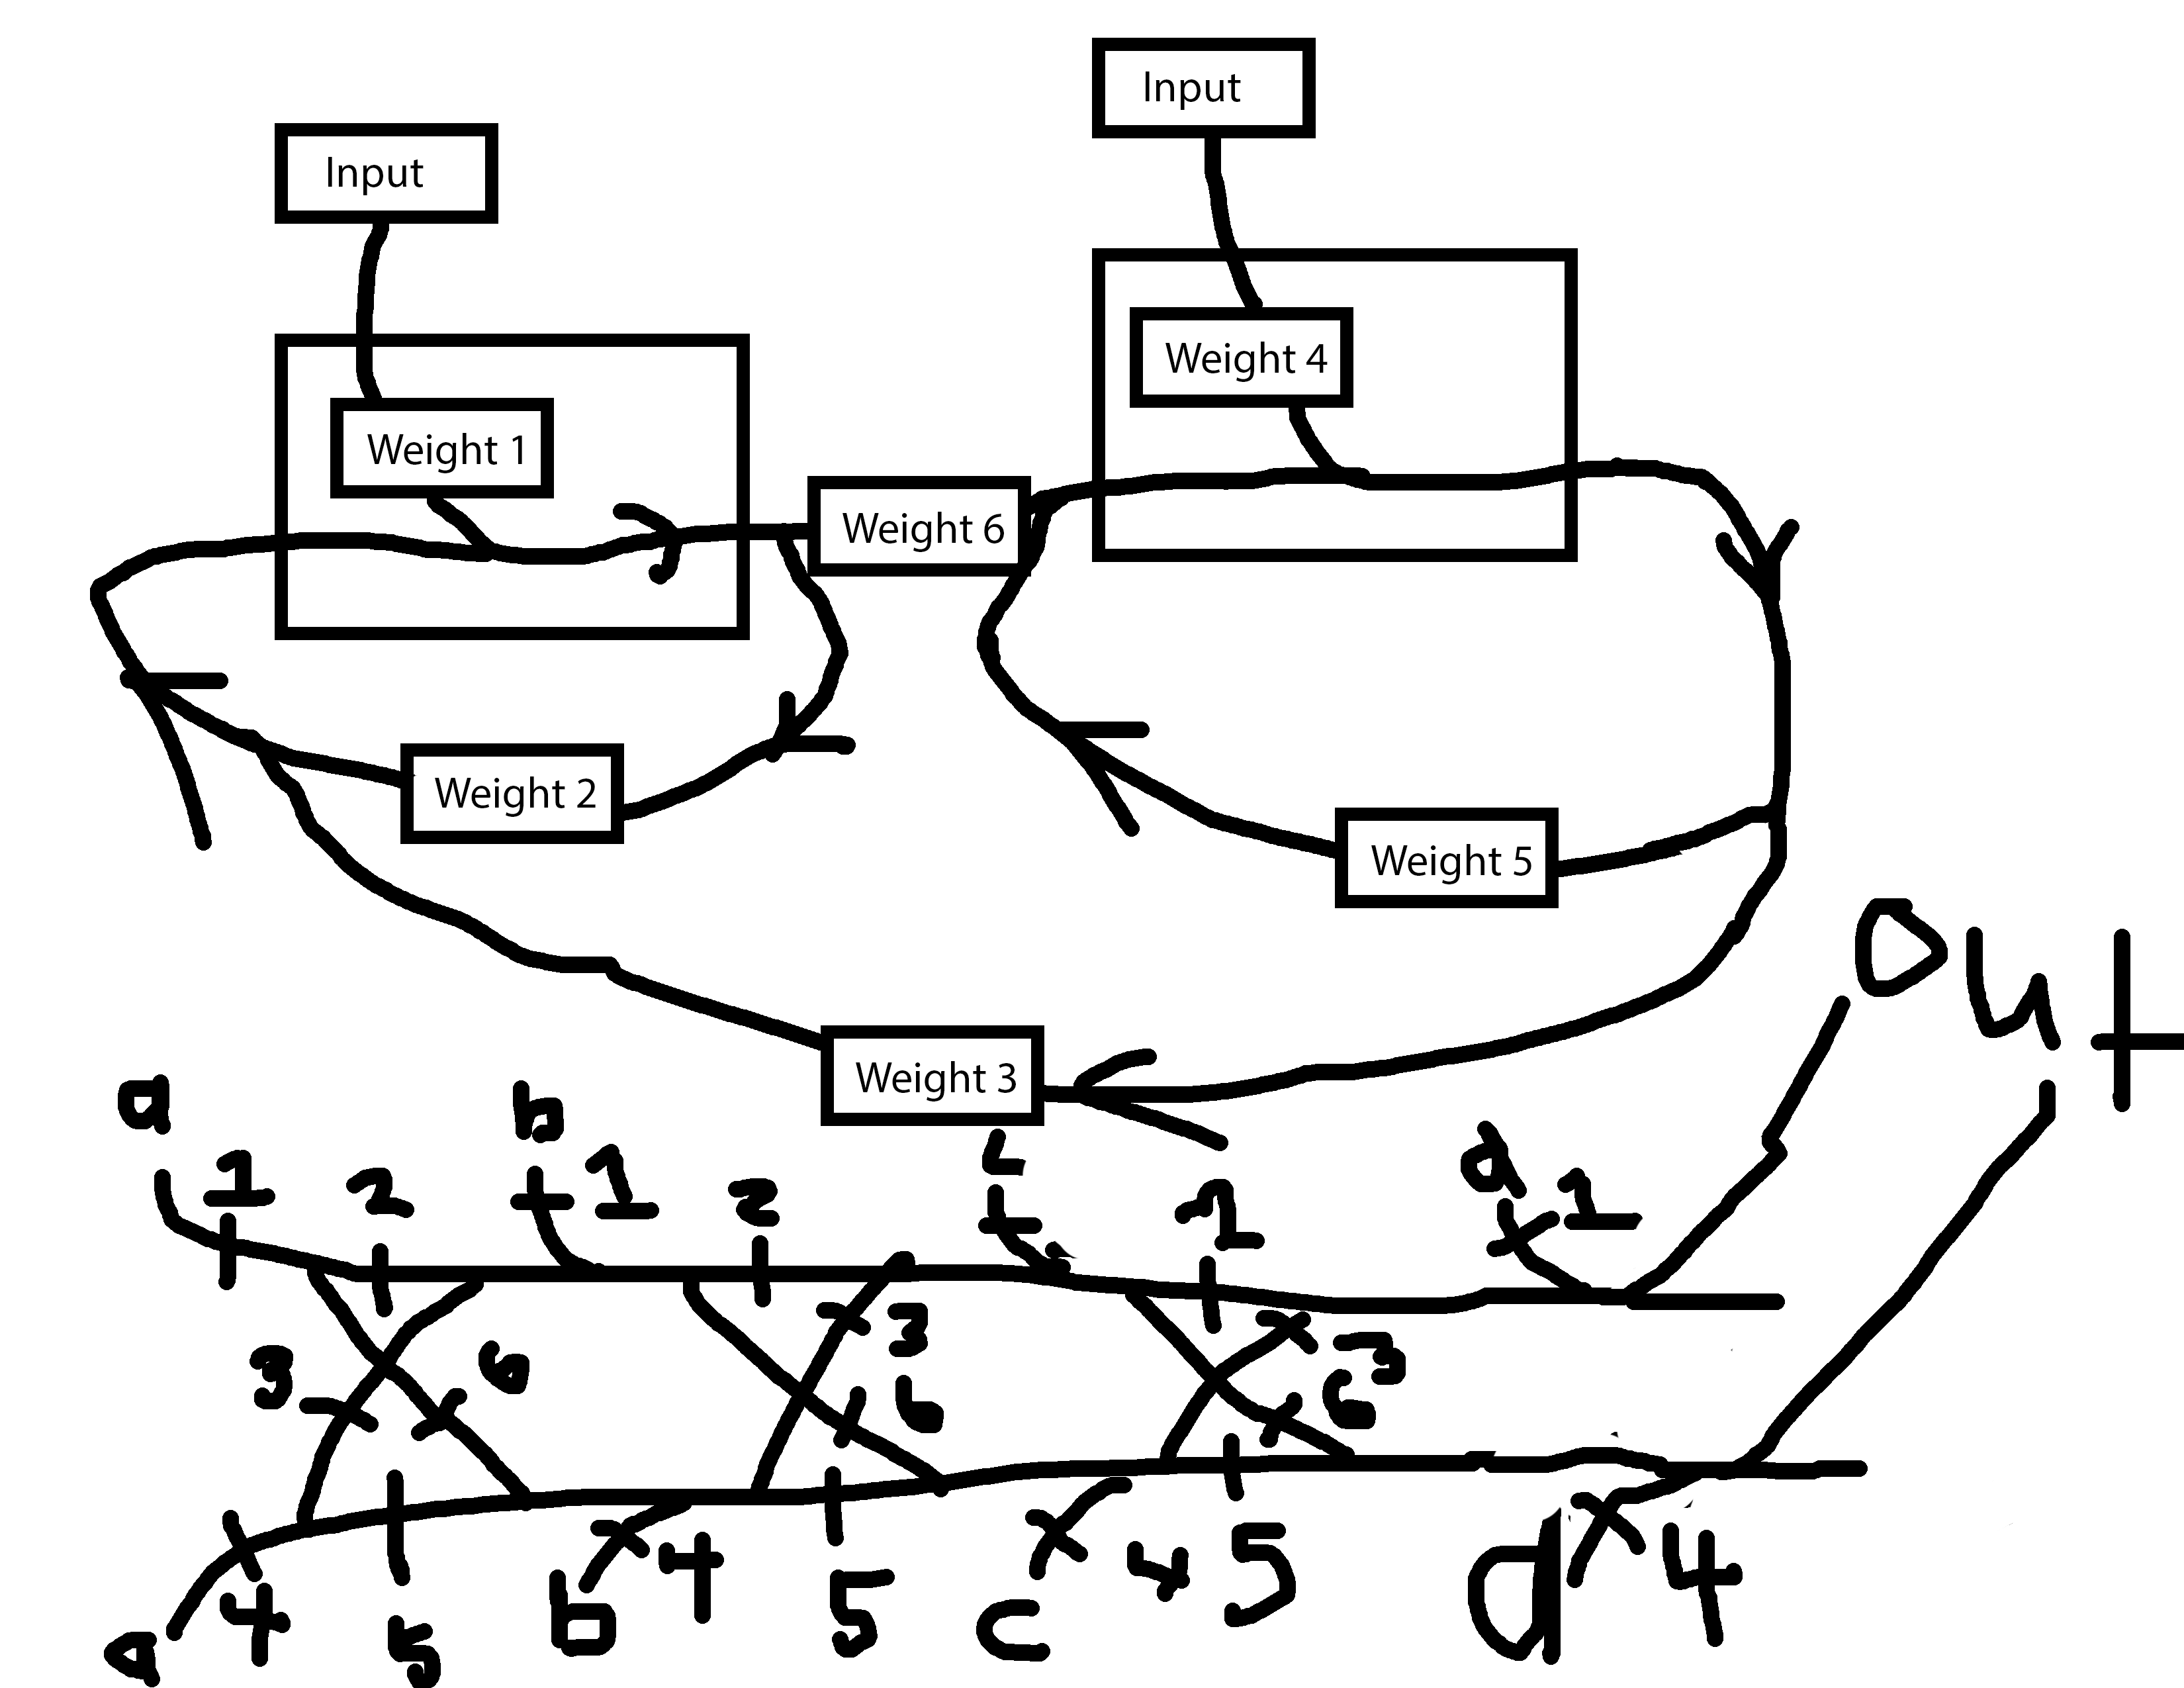

## Exercise 2c

Forget gate: W2 and W5

Input gate: W1 and W4

Output gate: W3 and W6

In [27]:
one_unit_LSTM = Sequential()
one_unit_LSTM.add(LSTM(units=1, input_shape=(None, 1),
                       activation='linear', recurrent_activation='linear',
                       use_bias=False, unit_forget_bias=False,
                       kernel_initializer='zeros',
                       recurrent_initializer='zeros',
                       return_sequences=True))

In [28]:
one_unit_LSTM_weights = one_unit_LSTM.get_weights()
one_unit_LSTM_weights

[array([[0., 0., 0., 0.]], dtype=float32),
 array([[0., 0., 0., 0.]], dtype=float32)]

In [29]:
one_unit_LSTM_weights[0][0][0] = 1
one_unit_LSTM_weights[0][0][1] = 0
one_unit_LSTM_weights[0][0][2] = 1
one_unit_LSTM_weights[0][0][3] = 1
one_unit_LSTM_weights[1][0][0] = 0
one_unit_LSTM_weights[1][0][1] = 0
one_unit_LSTM_weights[1][0][2] = 0
one_unit_LSTM_weights[1][0][3] = 0
one_unit_LSTM.set_weights(one_unit_LSTM_weights)
one_unit_LSTM.get_weights()

[array([[1., 0., 1., 1.]], dtype=float32),
 array([[0., 0., 0., 0.]], dtype=float32)]

In [30]:
one_unit_LSTM.predict(numpy.array([ [[0], [1], [2], [4]] ]))

array([[[ 0.],
        [ 1.],
        [ 8.],
        [64.]]], dtype=float32)